In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine,reflect = True)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [9]:
#find the columns of measurement 

measurement_cols = inspector.get_columns('measurement')
for column in measurement_cols:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#find the columns of station Station'
station_cols = inspector.get_columns('station')
for column in station_cols:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
#import # Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

Text(0, 0.5, 'Inches')

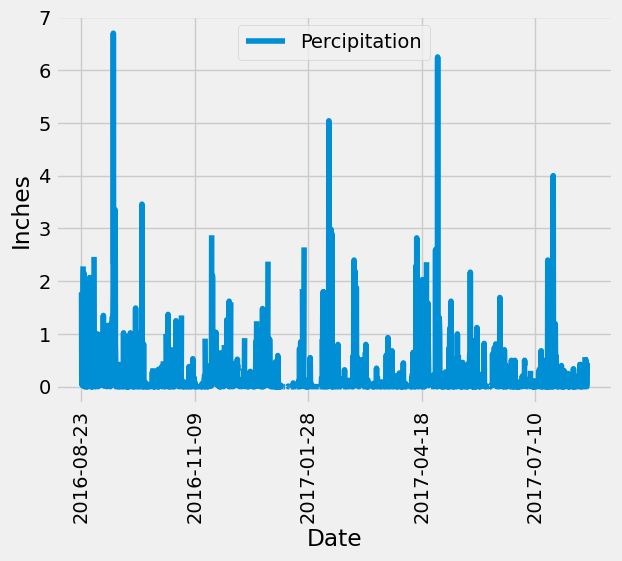

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
columns = (Measurement.date,Measurement.prcp)
prcp_data = session.query(*columns).filter(Measurement.date>= last_year).all()

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_score = pd.DataFrame(prcp_data,columns=["Date","Percipitation"]).set_index('Date')
# prcp_score = prcp_score.rename(columns ={'prcp':'precipitation'})
# Sort the dataframe by date
prcp_score = prcp_score.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_score.plot(rot=90)
plt.ylabel("Inches")

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_score.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query()
session.query(func.count(Station.station)).all()

[(9,)]

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostest_active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_id = mostest_active[0]
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active_id).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

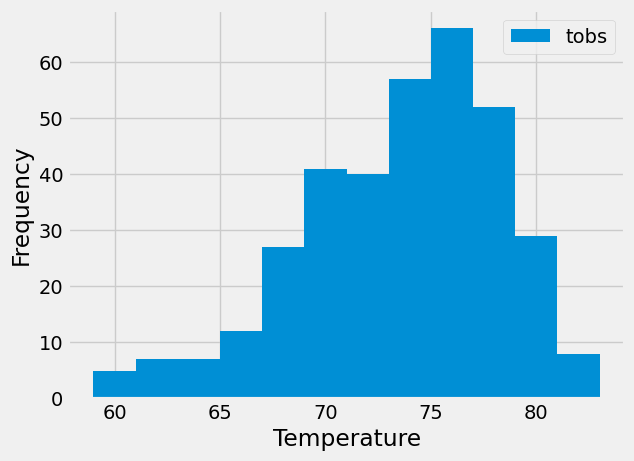

In [18]:
# Using the most active station id
import matplotlib.pyplot as plt
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_station =session.query(Measurement.date,Measurement.tobs).filter(Measurement.station==most_active_id).\
filter(Measurement.date> last_year).all()

last_year_df = pd.DataFrame(last_year_station)

last_year_df.plot(kind="hist", bins = 12)
plt.xlabel("Temperature")

[]


# Close Session

In [85]:
# Close Session
session.close()